##  1. box plot of the number of posts and comments for each fan page

In [2]:
import pyes

host = '114.32.24.166:9200'

def postcount(fid):
    conn = pyes.es.ES(host)
    tq = pyes.query.TermQuery(field="fid", value=fid)
    res1 = conn.search(query=tq , indices='facebook_nested' , doc_types='post')
    return len(res1)

def commentcount(fid):
    conn = pyes.es.ES(host)
    tq = pyes.query.TermQuery(field="fid", value=fid)
    res2 = conn.search(query=tq , indices='facebook_nested' , doc_types='comment')
    return len(res2)

fid1 = 101615286547831
fid2 = 324273577645211

In [3]:
import pandas as pd

a = float(postcount(fid1))
b = float(postcount(fid2))
c = float(commentcount(fid1))
d = float(commentcount(fid2))

post_total = a+b
comment_total = c+d

df = pd.DataFrame([[a/post_total, b/post_total], [c/comment_total, d/comment_total]], columns=['McDonald', 'KFC'] )

print a, b, c, d, df

694.0 1147.0 200237.0 57190.0    McDonald       KFC
0  0.376969  0.623031
1  0.777840  0.222160


In [111]:
df['index'] = list(['post','comments'])

print df

   McDonald       KFC     index
0  0.376969  0.623031      post
1  0.410740  0.589260  comments


array([<matplotlib.axes._subplots.AxesSubplot object at 0x000000000E6E71D0>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x000000000E8F30F0>], dtype=object)

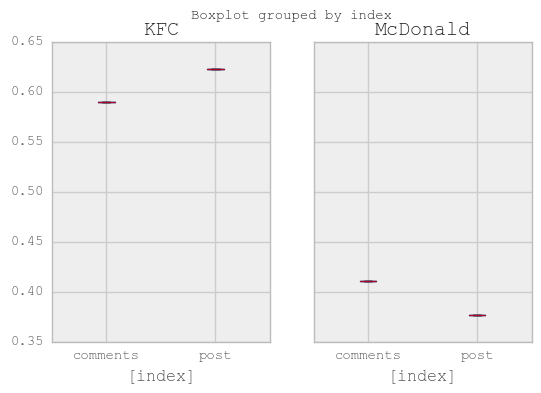

In [116]:
pd.options.display.mpl_style = 'default'
df.boxplot(by = 'index')

## 2. 個別的 (#) of post,  (# /  ratio) of post with sharing,  (# / ratio) of post with friend tagging 

In [ ]:
import pyes
import pandas as pd

host = '114.32.24.166:9200'

def postagg(fid):
    conn = pyes.es.ES(host)
    tq = pyes.query.TermQuery(field="fid", value=fid)
    res = conn.search(query=tq , indices='facebook_nested' , doc_types='post') 
    
    num_post = len(res)
    post_with_sharing = 0
    post_with_friend = 0
    
    for data in res:
        try:
            if data['shares']:
                post_with_sharing += 1
            if data['']:
                post_with_friend += 1
                
        except KeyError:
            continue
    
    df = pd.DataFrame({'Number of total post': [num_post], 'Number of post with sharing': [post_with_sharing], 'Ratio of post with sharing': [post_with_sharing/num_post], 'Number of post with friend tagging': [post_with_friend], 'Ratio of post with friend tagging': [post_with_friend/num_post]})
    return df

In [ ]:
fid1 = 101615286547831
fid2 = 324273577645211

a = postagg(fid1)
b = postagg(fid2)

print a, b

## 3. 各個粉絲頁每月po文的comment變化(max, min, mean)

In [ ]:
# Define functions to search the data in comment and post
import pyes
import pandas as pd

host = '114.32.24.166:9200'

def post_search(fid):
    conn = pyes.es.ES(host)
    tq = pyes.query.TermQuery(field="fid", value=fid)
    res1 = conn.search(query=tq , indices='facebook_nested' , doc_types='post')

    message = []
    month = []
    num_comment = []
    num_share = []
    
    for data in res1:
        try:
            month.append(data[''])
            if data['message']:
                message.append(data['message'])
            elif data['description']:
                message.append(data['description'])
            if data['comment_count']:
                num_comment.append(data['comment_count'])
            if data['shares']:
                num_share.append(data['shares'])
                
        except KeyError:
            continue
            
    df = pd.DataFrame({'month': [month], 'message': [message], 'number of comment': [num_comment], 'number of shares': [num_share]})
    return df
    
def comment_search(fid):
    conn = pyes.es.ES(host)
    tq = pyes.query.TermQuery(field="fid", value=fid)
    res2 = conn.search(query=tq , indices='facebook_nested' , doc_types='comment')
    
    comment = []
    friend_tag = []
    
    for data in res2:
        try:
            if data['message']:
                comment.append(data['message'])
            if 
                friend_tag
        except KeyError:
            continue
    
    df = pd.DataFrame({'comments': [comment]})
    return df

fid1 = 101615286547831
fid2 = 324273577645211

In [ ]:
re1 = post_search(fid1)
re2 = post_search(fid2)

print re1['message'][0]

In [ ]:
df = re1[['month', 'number of comment']

result = []

for i in (1, 13):
    df = df[df['month'] == i]
    biggest = df['number of comment'].max()
    smallest = df['number of comment'].min()
    mean = df['number of comment'].mean()
    result.append({'max': biggest, 'min': smallest, 'mean': mean})

dataf = pd.DataFrame(result)

## Analysis  2

In [ ]:
MC_data = comment_search(fid1)

## Analysis 3

In [ ]:
df1 = post_search(fid1)
df2 = post_search(fid2)

In [ ]:
import jieba

df1 = df1['message']
df2 = df2['message']

## Analysis 4